In [1]:
import tensorflow as tf
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
slimModelPath = 'model/super-fast-face-detector/slim/'
RFBModelPath = 'model/super-fast-face-detector/RFB/'
model = tf.keras.models.load_model(slimModelPath, compile=False)

In [3]:
imgPath = 'data/image/001_0001.png'
img = cv2.imread(imgPath)
h, w, _ = img.shape
img_resize = cv2.resize(img, (320, 240))
img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
img_resize = img_resize - 127.0
img_resize = img_resize / 128.0

In [4]:
%timeit model.predict(np.expand_dims(img_resize, axis=0))

48 ms ± 3.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
results = model.predict(np.expand_dims(img_resize, axis=0))
results

array([[4.1170544e-08, 1.0000000e+00, 5.2749485e-02, 6.9504291e-02,
        9.3550122e-01, 8.7162912e-01]], dtype=float32)

In [6]:
result = results[0]
start_x = int(result[2] * w)
start_y = int(result[3] * h)
end_x = int(result[4] * w)
end_y = int(result[5] * h)

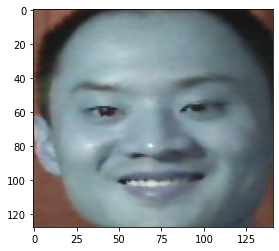

In [7]:
croppedImg = img[start_y:end_y,start_x:end_x,:]
plt.imshow(croppedImg)